## Imports

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Load dataset

In [37]:
df = pd.read_csv('JO_pivoted.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


,Unnamed: 0,region,year,barley,energy forest,fallow land,"field peas for cooking, fodder peas, vetches and field beans",green fodder,green peas,horticulture plants,...,triticale,unspecified arable land,utilized ley for hay,utilized ley for hay and pasture,utilized pasture,white beans,winter barley,winter rape,winter turnip rape,winter wheat
0,0,0114 Upplands Väsby,1981,500.0,0.0,179.0,0.0,43.0,0.0,0.0,...,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,80.0
1,1,0114 Upplands Väsby,1985,586.0,0.0,30.0,11.0,63.0,0.0,0.0,...,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,40.0
2,2,0114 Upplands Väsby,1989,264.0,0.0,124.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,14.0,477.0
3,3,0114 Upplands Väsby,1990,213.0,0.0,57.0,38.0,2.0,0.0,0.0,...,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0,2.0,520.0
4,4,0114 Upplands Väsby,1991,328.0,0.0,91.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,6.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,4055,2584 Kiruna,1999,0.0,0.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0
4056,4056,2584 Kiruna,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0
4057,4057,2584 Kiruna,2002,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,90.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0
4058,4058,2584 Kiruna,2003,0.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,69.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets select some features for dimensionality reduction
We will also run k-Means clustering to assign some colors to the clusters

In [38]:

#['barley', 'fallow land', 'oats', 'spring barley', 'spring wheat', 'total arable land', 'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat']
crop_features = ['barley', 'fallow land', 'oats', 'spring barley', 'spring wheat', 'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat']
X_crop = df[crop_features]

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['crop_cluster'] = kmeans.fit_predict(X_crop)

## Lets reduce the dimensions by both PCA and t-SNE

In [39]:
pca = PCA(n_components=2)
crop_pca = pca.fit_transform(X_crop)
crop_pca_df = pd.DataFrame(crop_pca, columns=["PC1", "PC2"])
crop_pca_df.index = X_crop.index
crop_pca_df["cluster"] = df.loc[X_crop.index, 'crop_cluster']

def run_tsne(perplexity=30, random_state=0):
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity, random_state=random_state)
    embedding = tsne.fit_transform(X_crop)
    emb_df = pd.DataFrame(embedding, columns=["TSNE1", "TSNE2"])
    emb_df.index = X_crop.index
    emb_df["cluster"] = df.loc[X_crop.index, 'crop_cluster']
    return emb_df

## Lets visualize the results

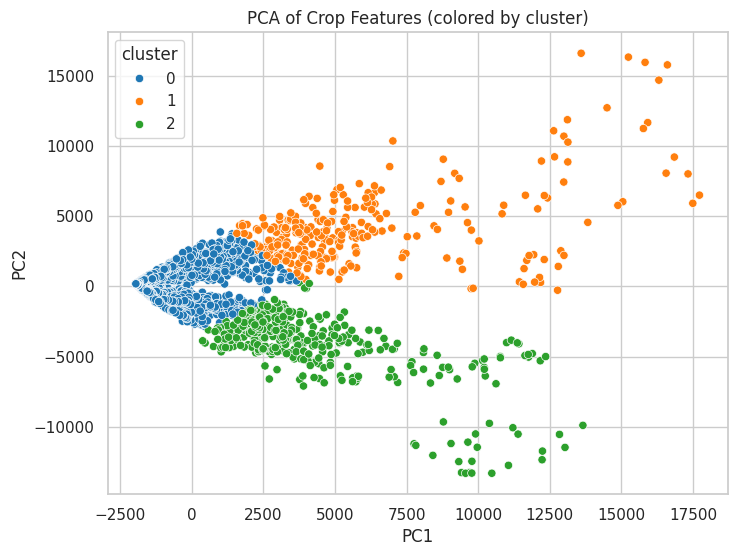

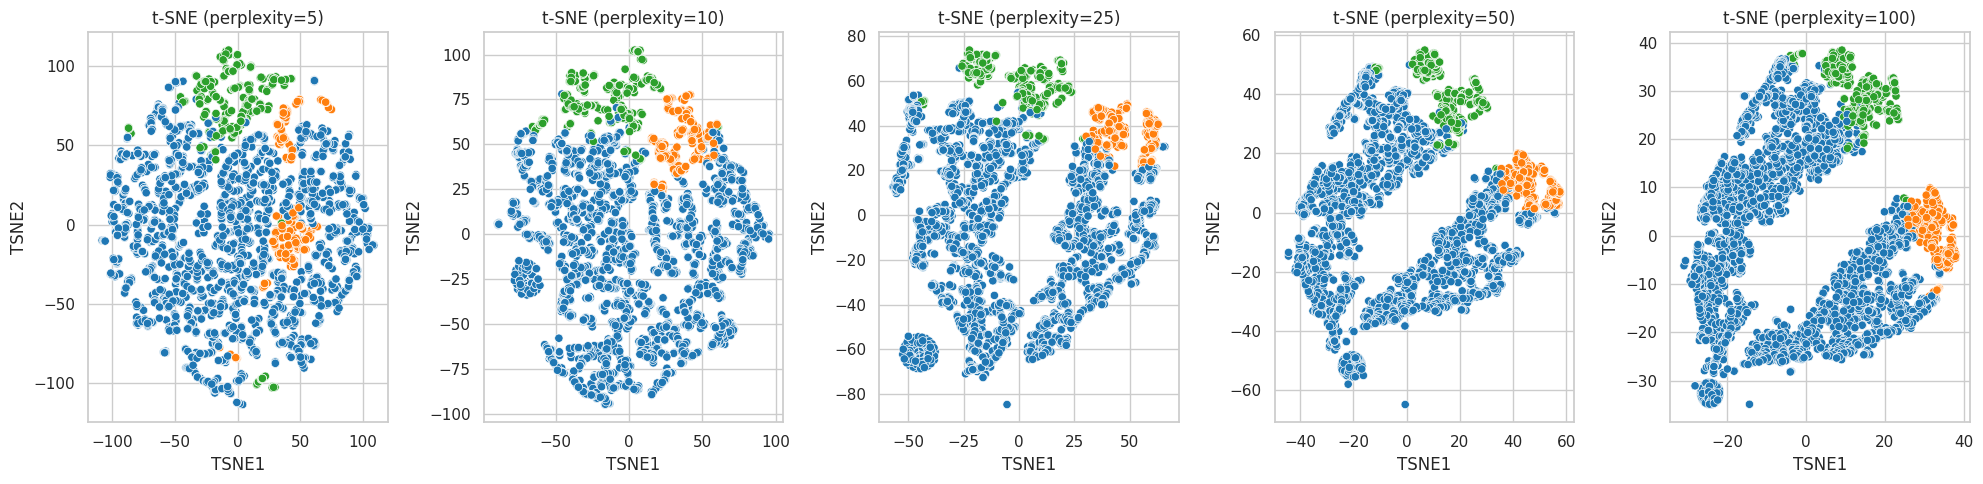

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=crop_pca_df, palette="tab10")
plt.title('PCA of Crop Features (colored by cluster)')
plt.show()

perplexities = [5, 10, 25, 50, 100]
fig, axes = plt.subplots(1, len(perplexities), figsize=(20,5))
for i, p in enumerate(perplexities):
    tsne_df = run_tsne(perplexity=p)
    sns.scatterplot(ax=axes[i], x="TSNE1", y="TSNE2", hue="cluster", data=tsne_df, palette="tab10", legend=False)
    axes[i].set_title(f't-SNE (perplexity={p})')
plt.tight_layout()
plt.show()

## Results
Our dataset is fundamentally continuous rather than categorical, and there is no clear separations into distinct groups. The data varies pretty smoothly across regions and years, and unfortunately dimensionality reduction using PCA and t-SNE, did not provide any meaningful clusters or visually interpretable insights.